# AULA 5

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import seaborn as sms

In [118]:
dados_url = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados = pd.read_csv(dados_url, compression = 'zip')

In [119]:
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [120]:
for i in range (len(dados.columns)):
    to_list = list(dados.columns[i])
    if (np.isin(to_list[1], '-')) ==  True:
        (to_list).remove('-')
        new_column = ''.join(to_list)
        dados.rename({dados.columns[i]:new_column}, axis=1, inplace=True)
        
        


In [121]:
mapa = {'droga': 'composto'}
dados.rename(columns=mapa, inplace=True)

In [122]:
dados.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


# IMPORTANDO O NOVO BANCO DE DADOS

In [123]:
dados_resultados = pd.read_csv('https://github.com/alura-cursos/imersao-dados-desafio-final/blob/main/Dados/dados_resultados.csv?raw=true')
dados_resultados.head()



,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# QUANTIDADE DE MECANISMOS DE AÇÃO ATIVOS POR EXPERIMENTO

In [124]:
dados_resultados.drop('id', axis=1).sum(axis=1)

0        1
1        0
2        3
3        0
4        1
        ..
23809    1
23810    1
23811    0
23812    1
23813    0
Length: 23814, dtype: int64

In [125]:
dados_resultados['n_moa'] = dados_resultados.drop('id', axis=1).sum(axis=1)


In [126]:
dados_resultados['ativo_moa'] = (dados_resultados['n_moa']!=0)

dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True


In [127]:
dados_combinados = pd.merge(dados, dados_resultados[['id','n_moa', 'ativo_moa']], on = 'id')
dados_combinados.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


In [128]:
dados_combinados.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


# SELECIONANDO O MODELO

In [60]:
modelo_rlogistica = LogisticRegression(max_iter = 1000)

# SELECIONANDO DADOS DE TREINO E DADOS DE TESTE

In [61]:
x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa']

In [83]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.2, random_state = 2, stratify = y)

# TREINANDO O MODELO

In [84]:
modelo_rlogistica.fit(x_treino , y_treino)

LogisticRegression(max_iter=1000)

# TESTANDO O NOSSO MODELO

In [85]:
print(str(modelo_rlogistica.score(x_teste, y_teste)*100)+'% ' + 'de acurácia')

61.956749947512066% de acurácia


# USANDO DUMMY CLASSIFIER

In [86]:
modelo_dummy = DummyClassifier('most_frequent')

modelo_dummy.fit(x_treino, y_treino)


S:\Anaconda\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass strategy=most_frequent as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


DummyClassifier(strategy='most_frequent')

In [87]:
previsao_dummy = modelo_dummy.predict(x_teste)

In [88]:
print(str(accuracy_score(y_teste, previsao_dummy)*100)+'% ' + 'de acurácia')

60.67604450976275% de acurácia


# UTILIZANDO DECISION TREE

In [94]:
x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa']
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.2, random_state = 2, stratify = y)


modelo_tree = DecisionTreeClassifier(max_depth = 3)

modelo_tree.fit(x_treino, y_treino)
print(str(modelo_tree.score(x_teste, y_teste)*100)+'% ' + 'de acurácia')



60.90699139197985% de acurácia


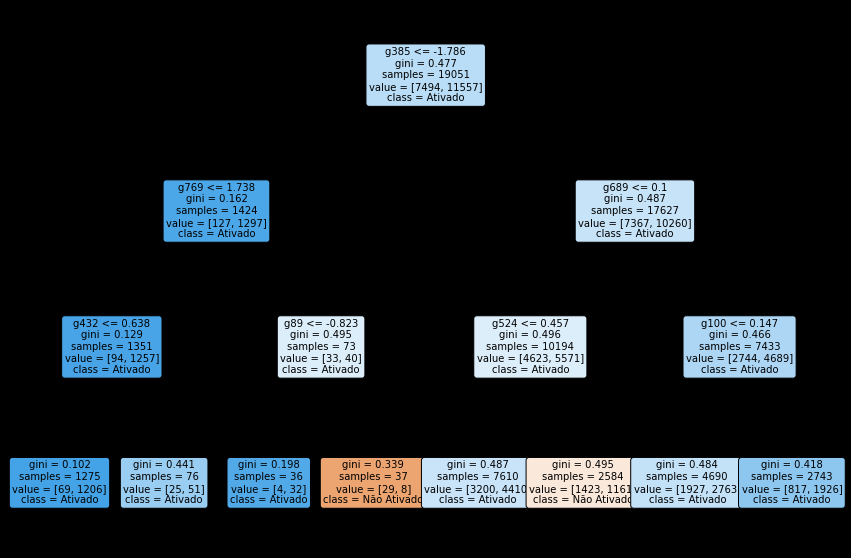

In [98]:
fig, ax = plt.subplots(figsize=(15,10), facecolor='k')

tree.plot_tree(modelo_tree,
              ax = ax,
              fontsize=10,
              rounded=True,
              filled=True,
              feature_names = x_treino.columns,
              class_names=['Não Ativado', 'Ativado'])
plt.show()

# AUMENTANDO O NUMERO DE DEPTHS DA ARVORE DE DECISÃO

### FAZENDO UM LOOP PARA CADA DEPTH DIFERENTE E SALVANDO OS RESULTADOS DE TREINO E TESTE

In [104]:
x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa']
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.2, random_state = 2, stratify = y)


loop_teste = []
loop_treino = []
for i in range(1,15):
    modelo_tree = DecisionTreeClassifier(max_depth = i)
    modelo_tree.fit(x_treino, y_treino)
    loop_teste.append(modelo_tree.score(x_teste, y_teste))
    loop_treino.append(modelo_tree.score(x_treino, y_treino))

    #print(str(modelo_tree.score(x_teste, y_teste)*100)+'% ' + 'de acurácia')



In [105]:
loop_teste

[0.6067604450976275,
 0.6067604450976275,
 0.6090699139197985,
 0.6170480789418433,
 0.6178878857862692,
 0.6162082720974176,
 0.6246063405416754,
 0.62019735460844,
 0.6216670165861852,
 0.6195674994751207,
 0.62019735460844,
 0.6155784169640982,
 0.6090699139197985,
 0.6090699139197985]

In [106]:
loop_treino

[0.6066348223190384,
 0.6066348223190384,
 0.6214896855808094,
 0.6313054432838171,
 0.6384966668416356,
 0.6498346543488531,
 0.6655818592199885,
 0.6780746417510892,
 0.695659020523857,
 0.7179150700750617,
 0.7401711196262664,
 0.7630045666894126,
 0.7878326597029027,
 0.8079365912550522]

# CONCLUI-SE QUE AUMENTAR A PROFUNDIDADE DA ARVORE DE DECISÃO NÃO AUMENTA A SUA CAPACIDADE PREDITIVA

## SE ANALISARMOS O GRÁFICO ABAIXO, PERCEBE-SE QUE ATÉ UMA PROFUNDIDADE DE 7, A SUA CAPACIDADE PREDITIVA NO TESTE AUMENTA, APÓS ISSO, DECAI. PODEMOS INFERIR QUE UMA BOA CONFIGURAÇÃO DE PROFUNDIDADE PARA O CLASSIFICADOR DECISION TREE SERIA 7

<AxesSubplot:>

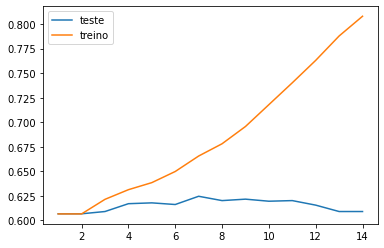

In [107]:
sms.lineplot(x=range(1,15), y=loop_teste, label = 'teste')
sms.lineplot(x=range(1,15), y=loop_treino, label = 'treino')

# UTILIZANDO RANDOM FOREST

In [132]:
x = dados_combinados.drop([ 'composto','id', 'n_moa', 'ativo_moa'], axis=1) #tirando as colunas de strings e que podem dar uma "ajuda" para o nosso classificador
x=pd.get_dummies(x, columns = ['tratamento', 'dose', 'tempo']) #binarizando essas colunas
y = dados_combinados['ativo_moa']
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.2, random_state = 2, stratify = y)


modelo_tree = RandomForestClassifier()
modelo_tree.fit(x_treino, y_treino)

print(str(modelo_tree.score(x_teste, y_teste)*100)+'% ' + 'de acurácia')



68.6122191895864% de acurácia


# DESAFIO 1 E 2: TENTAR OUTROS MODELOS OU MUDE OS PARÂMETROS DOS MODELOS QUE TESTAMOS EM AULA

### https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


### OLHEI O FLUXOGRAMA E O QUE MELHOR SE ADEQUOU FOI O LINEAR SVC: https://scikit-learn.org/stable/modules/svm.html#classification

### VOU SELECIONAR AQUI O RANDOM FOREST PARA ALTERAR OS PARÂMETROS, JÁ QUE SE TORNA UM CLASSIFICADOR QUE APRESENTOU MELHOR ACURÁCIA E IREI TENTAR MELHORAR SEUS RESULTADOS.

### AQUI ESTOU REALIZANDO UM LOOP PARA ANALISAR QUAIS RANDOM_STATES DO TRAIN_TEST_SPLIT E DO CLASSIFICADOR RANDOM FOREST MELHOR SE ADEQUAM PARA TER A MELHOR ACURÁCIA POSSÍVEL


### COLOQUEI OS DOIS FOR COM RANGE ATÉ 5, SENÃO IRIA DEMORAR DEMAIS

In [145]:
x = dados_combinados.drop([ 'composto','id', 'n_moa', 'ativo_moa'], axis=1) #tirando as colunas de strings e que podem dar uma "ajuda" para o nosso classificador
x=pd.get_dummies(x, columns = ['tratamento', 'dose', 'tempo']) #binarizando essas colunas
y = dados_combinados['ativo_moa']


teste_results=[]
rand_st_values=[]
for i in range (5):
    for j in range(5):
        x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.2, random_state = i, stratify = y)


        modelo_tree = RandomForestClassifier(random_state=j)
        modelo_tree.fit(x_treino, y_treino)
        teste_results.append(modelo_tree.score(x_teste, y_teste))
        rand_st_values.append('i = ' + str(i) + ', ' + 'j = ' + str(j))




In [147]:
rand_st_values

['i = 0, j = 0',
 'i = 0, j = 1',
 'i = 0, j = 2',
 'i = 0, j = 3',
 'i = 0, j = 4',
 'i = 1, j = 0',
 'i = 1, j = 1',
 'i = 1, j = 2',
 'i = 1, j = 3',
 'i = 1, j = 4',
 'i = 2, j = 0',
 'i = 2, j = 1',
 'i = 2, j = 2',
 'i = 2, j = 3',
 'i = 2, j = 4',
 'i = 3, j = 0',
 'i = 3, j = 1',
 'i = 3, j = 2',
 'i = 3, j = 3',
 'i = 3, j = 4',
 'i = 4, j = 0',
 'i = 4, j = 1',
 'i = 4, j = 2',
 'i = 4, j = 3',
 'i = 4, j = 4']

In [157]:
df_results = pd.DataFrame([ rand_st_values,teste_results]).T

In [158]:
df_results

,0,1
0,"i = 0, j = 0",0.687382
1,"i = 0, j = 1",0.686542
2,"i = 0, j = 2",0.690321
3,"i = 0, j = 3",0.686962
4,"i = 0, j = 4",0.690741
5,"i = 1, j = 0",0.685492
6,"i = 1, j = 1",0.689062
7,"i = 1, j = 2",0.685912
8,"i = 1, j = 3",0.691161
9,"i = 1, j = 4",0.691581


In [162]:
df_results=df_results.set_axis(['valor de i e j', 'Acurácia'], axis=1)

In [163]:
df_results

,valor de i e j,Acurácia
0,"i = 0, j = 0",0.687382
1,"i = 0, j = 1",0.686542
2,"i = 0, j = 2",0.690321
3,"i = 0, j = 3",0.686962
4,"i = 0, j = 4",0.690741
5,"i = 1, j = 0",0.685492
6,"i = 1, j = 1",0.689062
7,"i = 1, j = 2",0.685912
8,"i = 1, j = 3",0.691161
9,"i = 1, j = 4",0.691581


# MAIOR ACURÁCIA

In [165]:
np.argmax(df_results['Acurácia']) #MAIOR ACURACIA COM O RANDOM_STATE=16

9

In [167]:
df_results['valor de i e j'][9]

'i = 1, j = 4'

In [142]:
df_results.loc[np.argmax(df_results)]

Acurácia    0.693051
Name: 16, dtype: float64

In [168]:
x = dados_combinados.drop([ 'composto','id', 'n_moa', 'ativo_moa'], axis=1) #tirando as colunas de strings e que podem dar uma "ajuda" para o nosso classificador
x=pd.get_dummies(x, columns = ['tratamento', 'dose', 'tempo']) #binarizando essas colunas
y = dados_combinados['ativo_moa']


x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.2, random_state = 1, stratify = y)


modelo_tree = RandomForestClassifier(random_state=4)
modelo_tree.fit(x_treino, y_treino)




RandomForestClassifier(random_state=4)

In [170]:
modelo_tree.score(x_teste, y_teste)

0.6915809363846316

In [169]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = modelo_tree.predict(x_teste)
target_names = ['Ativou o MoA','Não ativou o MoA']
classification_report1=classification_report(y_teste, predictions, target_names=target_names)
print(classification_report1)

                  precision    recall  f1-score   support

    Ativou o MoA       0.84      0.27      0.41      1873
Não ativou o MoA       0.67      0.97      0.79      2890

        accuracy                           0.69      4763
       macro avg       0.75      0.62      0.60      4763
    weighted avg       0.74      0.69      0.64      4763



# ADICIONANDO PESOS AS CLASSES, PORQUE TEMOS UM DESBALANCEAMENTO DELAS

In [174]:
from sklearn.utils import class_weight

weights=class_weight.compute_class_weight('balanced', np.unique(y_treino), y_treino)


S:\Anaconda\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass classes=[False  True], y=5172     False
21472    False
3379      True
18702     True
4642     False
         ...  
15308    False
19158     True
22590     True
4991      True
12052     True
Name: ativo_moa, Length: 19051, dtype: bool as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [176]:
weights

array([1.27108353, 0.82421909])

In [177]:
x = dados_combinados.drop([ 'composto','id', 'n_moa', 'ativo_moa'], axis=1) #tirando as colunas de strings e que podem dar uma "ajuda" para o nosso classificador
x=pd.get_dummies(x, columns = ['tratamento', 'dose', 'tempo']) #binarizando essas colunas
y = dados_combinados['ativo_moa']


x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.2, random_state = 1, stratify = y)


modelo_tree = RandomForestClassifier(random_state=4, class_weight = {0: weights[0], 1:weights[1]})
modelo_tree.fit(x_treino, y_treino)



RandomForestClassifier(class_weight={0: 1.2710835334934614,
                                     1: 0.8242190879986155},
                       random_state=4)

In [178]:
modelo_tree.score(x_teste, y_teste)

0.6928406466512702

In [182]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = modelo_tree.predict(x_teste)
target_names = ['Ativou o MoA','Não ativou o MoA']
classification_report1=classification_report(y_teste, predictions, target_names=target_names)
print(classification_report1)

                  precision    recall  f1-score   support

    Ativou o MoA       0.90      0.25      0.39      1873
Não ativou o MoA       0.67      0.98      0.80      2890

        accuracy                           0.69      4763
       macro avg       0.78      0.61      0.59      4763
    weighted avg       0.76      0.69      0.63      4763



# DESAFIO 3: TESTE OUTRAS PERGUNTAS DE CLASSIFICAÇÃO

# DESAFIO 4: ESCOLHA A DROGA MAIS UTILIZADA E TENTE CRIAR UM MODELO QUANDO É UTILIZADA A DROGA, OU NÃO.